<a href="https://colab.research.google.com/github/KzBrain/pythonKazbek/blob/master/HW_6_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)
require(readxl)
install.packages('skimr')
library(skimr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
meta <- read_xlsx("/content/sample_data/metadata.xlsx",sheet = 1)
hdl <- read_tsv("/content/sample_data/high_density_lipids.tsv")
ldl <- read_tsv("/content/sample_data/low_density_lipids.tsv")

Rows: 27 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 29 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(meta)

Vial number,Patient number,Sucrose,Name,Group,Date,Age,Plasma volume,Ht,Wt,⋯,r lat max,r ant max,r pos max,l lat max,l ant max,l pos max,carotid IMT mean,Plaque,Statins,comorbidities
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,50,0,"Woodard, Dillon",0,2022-03-26,63,6.5,163,84.0,⋯,0.65,0.80,0.80,0.81,0.78,0.80,0.6425000,1,1,NA
2,51,0,"Kuck, Breanna",0,2023-12-23,47,5.5,179,111.0,⋯,1.03,0.92,1.03,1.03,1.03,1.09,0.8400000,1,0,NA
3,52,0,"Thomas, Terrance",1,2022-10-10,57,7.0,164,80.0,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016
4,53,0,"Moua, Kensue",1,2022-12-21,72,5.0,160,58.8,⋯,0.91,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar)
5,54,0,"Soriano, Ryan",1,2023-03-16,57,5.0,180,71.0,⋯,1.20,1.20,1.25,1.10,1.30,1.13,1.0983333,1,1,NA
6,55,0,"Munoz-Lujan, Evangelina",1,2023-03-25,79,6.2,160,64.0,⋯,0.88,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland"


In [ ]:
str(meta)

tibble [38 × 49] (S3: tbl_df/tbl/data.frame)
 $ Vial number     : num [1:38] 1 2 3 4 5 6 7 8 9 10 ...
 $ Patient number  : num [1:38] 50 51 52 53 54 55 56 57 58 59 ...
 $ Sucrose         : num [1:38] 0 0 0 0 0 0 0 0 0 0 ...
 $ Name            : chr [1:38] "Woodard, Dillon" "Kuck, Breanna" "Thomas, Terrance" "Moua, Kensue" ...
 $ Group           : num [1:38] 0 0 1 1 1 1 1 1 0 1 ...
 $ Date            : POSIXct[1:38], format: "2022-03-26" "2023-12-23" ...
 $ Age             : num [1:38] 63 47 57 72 57 79 61 70 50 53 ...
 $ Plasma volume   : num [1:38] 6.5 5.5 7 5 5 6.2 6.5 5.5 6 5.5 ...
 $ Ht              : num [1:38] 163 179 164 160 180 160 164 162 150 172 ...
 $ Wt              : num [1:38] 84 111 80 58.8 71 64 67 61 79 88.2 ...
 $ BMI             : num [1:38] 31.6 34.6 29.7 23 21.9 ...
 $ Sys             : num [1:38] 125 125 132 130 135 110 124 135 142 120 ...
 $ Dia             : num [1:38] 76 82 80 90 75 75 82 78 95 80 ...
 $ PR              : num [1:38] 67 65 92 68 70 66 84 72 88 6

In [ ]:
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
help(glm)

In [ ]:
logr_m <- glm(formula = HT ~ AI + BMI + Statins, data = meta, family = binomial)
summary(logr_m)


Call:
glm(formula = HT ~ AI + BMI + Statins, family = binomial, data = meta)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -5.65180    2.46851  -2.290    0.022 *
AI           0.34258    0.46021   0.744    0.457  
BMI          0.18234    0.08695   2.097    0.036 *
Statins      1.02981    0.93606   1.100    0.271  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49.082  on 36  degrees of freedom
Residual deviance: 41.212  on 33  degrees of freedom
  (1 observation deleted due to missingness)
AIC: 49.212

Number of Fisher Scoring iterations: 4


AI: Коэффициент для переменной AI равен 0.34258. Это означает, что при увеличении значения AI на единицу, логарифм шансов HT увеличивается на примерно 0.34258, при условии, что другие предикторы остаются постоянными. Однако, p-value для этого коэффициента составляет 0.457, что говорит о том, что он не является статистически значимым на уровне значимости 0.05.
BMI: Коэффициент для переменной BMI равен 0.18234. Это означает, что при увеличении значения BMI на единицу, логарифм шансов HT увеличивается на примерно 0.18234, при условии, что другие предикторы остаются постоянными. p-value для этого коэффициента составляет 0.036, что говорит о его статистической значимости на уровне значимости 0.05.
Statins: Коэффициент для переменной Statins равен 1.02981. Это означает, что при увеличении значения переменной Statins на единицу, логарифм шансов HT увеличивается на примерно 1.02981, при условии, что другие предикторы остаются постоянными. Однако, p-value для этого коэффициента составляет 0.271, что говорит о его нестатистической значимости на уровне значимости 0.05.

In [ ]:
print(vif(logr_m))

      AI      BMI  Statins 
1.370026 1.091604 1.309780 


В этих данных все показатели VIF находятся в этом диапазоне

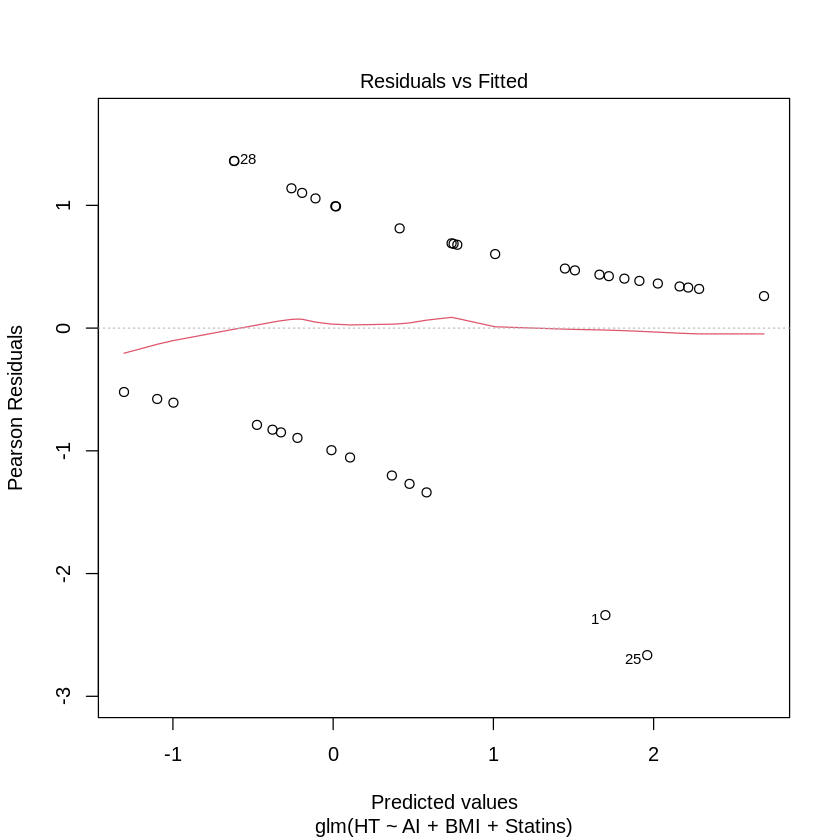

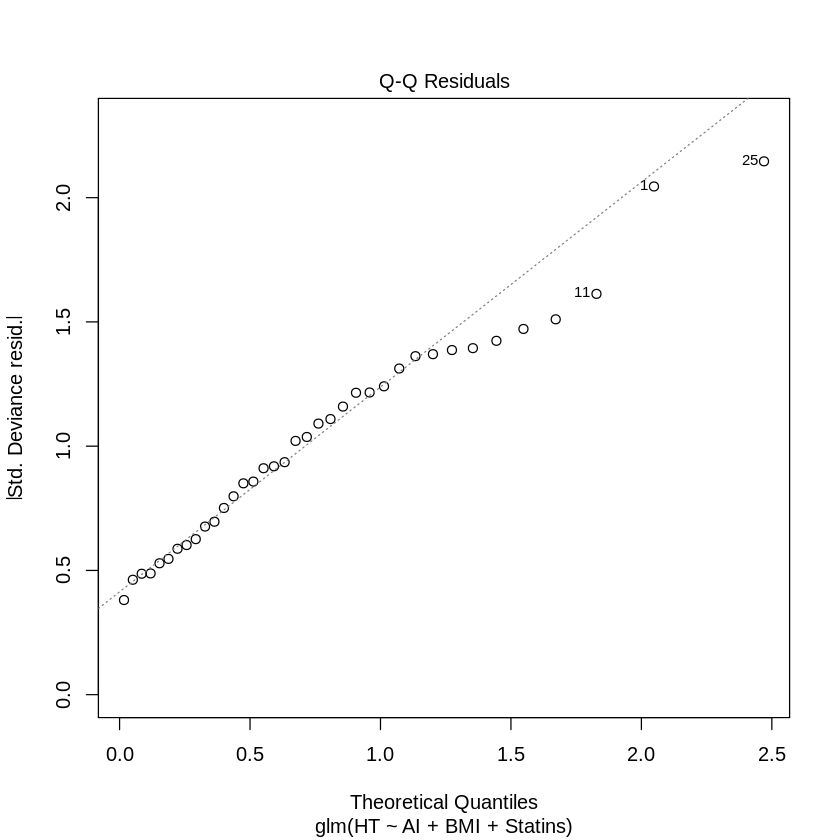

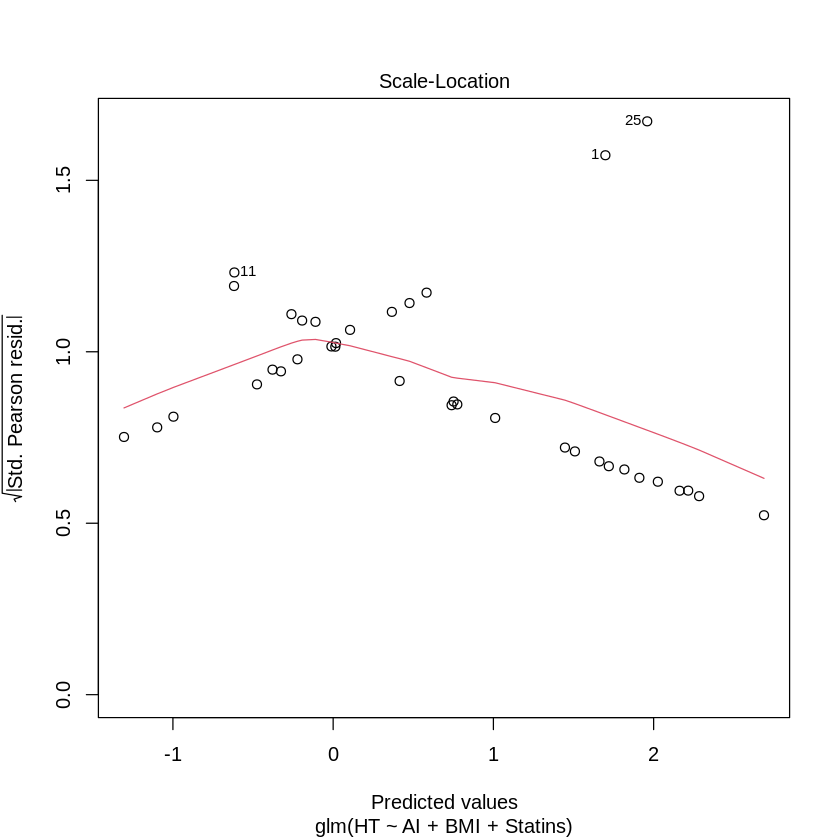

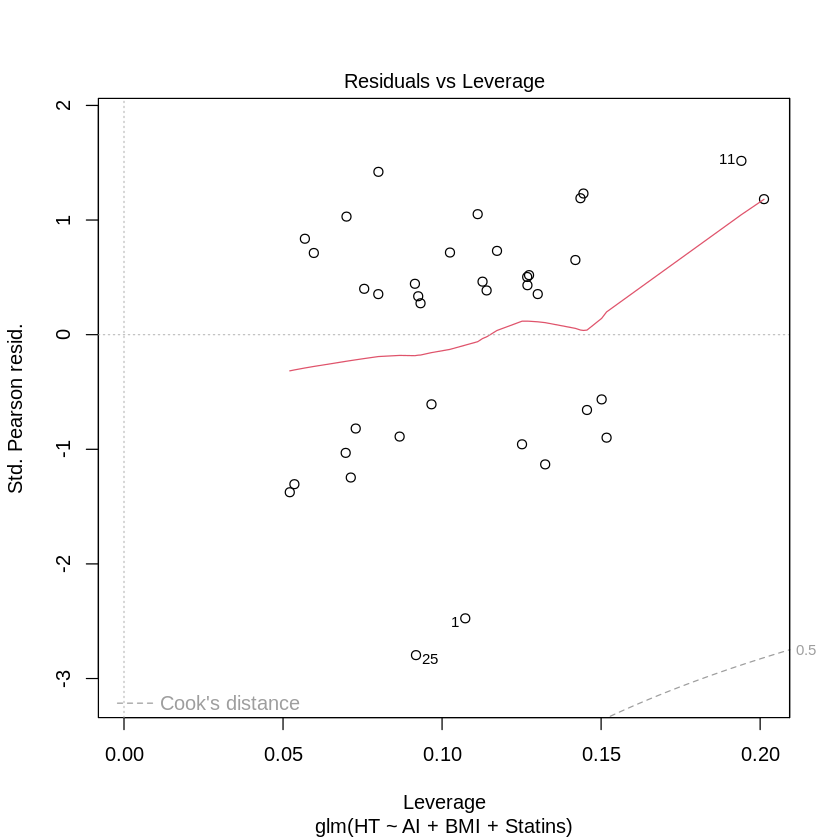

In [ ]:
plot(logr_m)

In [ ]:
str(meta)

tibble [38 × 49] (S3: tbl_df/tbl/data.frame)
 $ Vial number     : num [1:38] 1 2 3 4 5 6 7 8 9 10 ...
 $ Patient number  : num [1:38] 50 51 52 53 54 55 56 57 58 59 ...
 $ Sucrose         : num [1:38] 0 0 0 0 0 0 0 0 0 0 ...
 $ Name            : chr [1:38] "Woodard, Dillon" "Kuck, Breanna" "Thomas, Terrance" "Moua, Kensue" ...
 $ Group           : num [1:38] 0 0 1 1 1 1 1 1 0 1 ...
 $ Date            : POSIXct[1:38], format: "2022-03-26" "2023-12-23" ...
 $ Age             : num [1:38] 63 47 57 72 57 79 61 70 50 53 ...
 $ Plasma volume   : num [1:38] 6.5 5.5 7 5 5 6.2 6.5 5.5 6 5.5 ...
 $ Ht              : num [1:38] 163 179 164 160 180 160 164 162 150 172 ...
 $ Wt              : num [1:38] 84 111 80 58.8 71 64 67 61 79 88.2 ...
 $ BMI             : num [1:38] 31.6 34.6 29.7 23 21.9 ...
 $ Sys             : num [1:38] 125 125 132 130 135 110 124 135 142 120 ...
 $ Dia             : num [1:38] 76 82 80 90 75 75 82 78 95 80 ...
 $ PR              : num [1:38] 67 65 92 68 70 66 84 72 88 6

In [ ]:
logr_m1 <- glm(HT ~ BMI + Sys + Dia + Choi...25 + Choi...29, data = meta, family = binomial())
summary(logr_m1)


Call:
glm(formula = HT ~ BMI + Sys + Dia + Choi...25 + Choi...29, family = binomial(), 
    data = meta)

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -8.08962    4.68092  -1.728   0.0839 .
BMI          0.26345    0.10611   2.483   0.0130 *
Sys          0.07083    0.03933   1.801   0.0717 .
Dia         -0.13606    0.06869  -1.981   0.0476 *
Choi...25    0.01258    0.01278   0.984   0.3250  
Choi...29         NA         NA      NA       NA  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 50.982  on 37  degrees of freedom
Residual deviance: 36.704  on 33  degrees of freedom
AIC: 46.704

Number of Fisher Scoring iterations: 5


В этой модели только BMI  (0.0130) и Dia (0.0476) являются статистический значимы. AIC (Критерий информационной сложности) 46.704

In [ ]:
logr_m2 <- glm(HT ~ BMI + LVH, data = meta, family = binomial())
summary(logr_m1)


Call:
glm(formula = HT ~ BMI + LVH, family = binomial(), data = meta)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -4.74496    2.36624  -2.005   0.0449 *
BMI          0.17430    0.08914   1.955   0.0505 .
LVH          1.63509    0.91558   1.786   0.0741 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 50.982  on 37  degrees of freedom
Residual deviance: 39.958  on 35  degrees of freedom
AIC: 45.958

Number of Fisher Scoring iterations: 4


In [ ]:
print(vif(logr_m2))

     BMI      LVH 
1.003578 1.003578 


In [ ]:
cor.test(meta$BMI,meta$LVH)


	Pearson's product-moment correlation

data:  meta$BMI and meta$LVH
t = 1.9815, df = 36, p-value = 0.05521
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.006767197  0.575575892
sample estimates:
      cor 
0.3135946 


В ээтом случае мы видем оценка эффекта существенно непоменялась, однако дисперсия оценки упала у BMI.P-значение для теста корреляции равно 0.05521. Это означает, что если бы истинная корреляция между BMI и LVH была равна нулю (нулевая гипотеза), вероятность получить наблюдаемое или более экстремальное значение корреляции составляет 0.05521. Обычно уровень значимости (обычно 0.05) используется для принятия решения об отвержении нулевой гипотезы. В данном случае p-значение немного выше 0.05, что может указывать на то, что корреляция статистически не значима на уровне 5% значимости.Значения VIF (Variance Inflation Factor) для переменных BMI и LVH равны примерно 1. Это говорит о том, что мультиколлинеарность между этими переменными отсутствует или незначительна.

In [ ]:
logr_m2 <- glm(HT ~ BMI + IHD, data = meta, family = binomial())
summary(logr_m2)


Call:
glm(formula = HT ~ BMI + IHD, family = binomial(), data = meta)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -6.60159    2.67654  -2.466   0.0136 *
BMI          0.22908    0.09523   2.406   0.0161 *
IHD          1.90004    0.84415   2.251   0.0244 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 50.982  on 37  degrees of freedom
Residual deviance: 37.729  on 35  degrees of freedom
AIC: 43.729

Number of Fisher Scoring iterations: 5


Таким образом, на основе результатов можно сделать вывод о том, что переменные BMI и IHD статистически значимо связаны с наличием гипертонии.







In [ ]:
print(vif(logr_m2))

     BMI      IHD 
1.091536 1.091536 


Значения VIF для переменных BMI и IHD равны примерно 1.092. Это означает, что мультиколлинеарность между этими двумя переменными отсутствует или незначительна.

In [ ]:
cor.test(meta$BMI,meta$IHD)


	Pearson's product-moment correlation

data:  meta$BMI and meta$IHD
t = 0.45839, df = 36, p-value = 0.6494
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2495853  0.3864485
sample estimates:
       cor 
0.07617606 


на основе результатов можно сделать вывод о том, что между переменными BMI и IHD нет статистически значимой корреляции на уровне значимости 0.05.

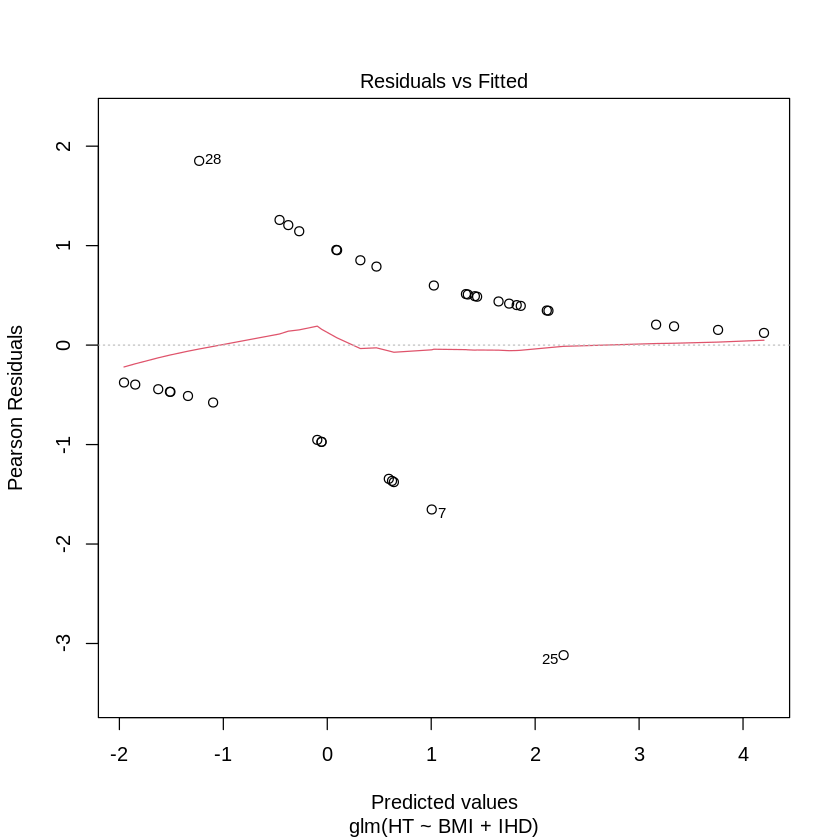

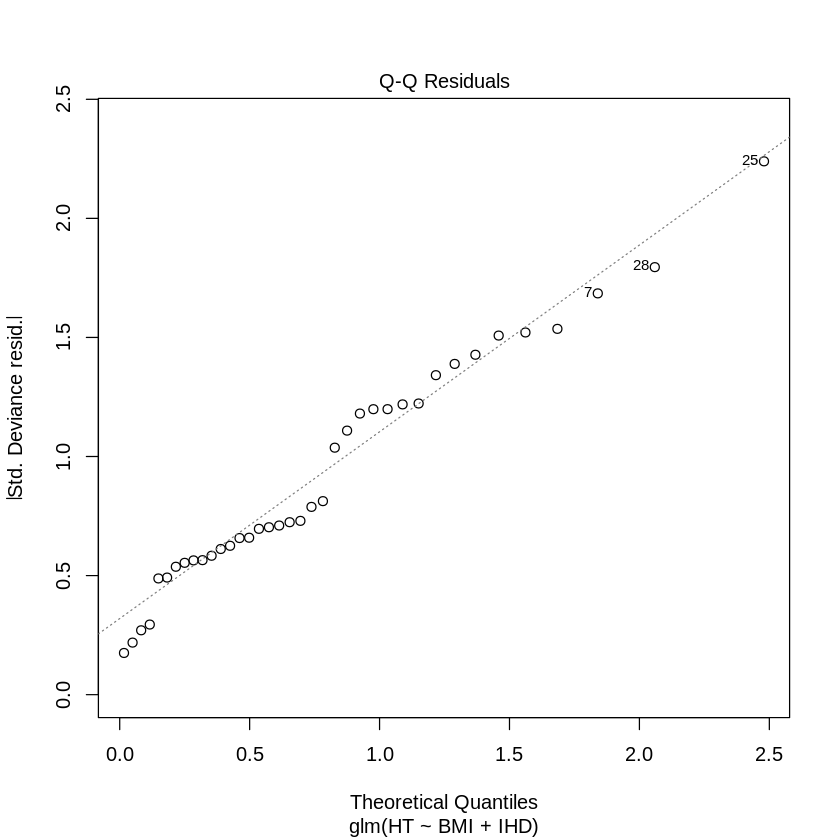

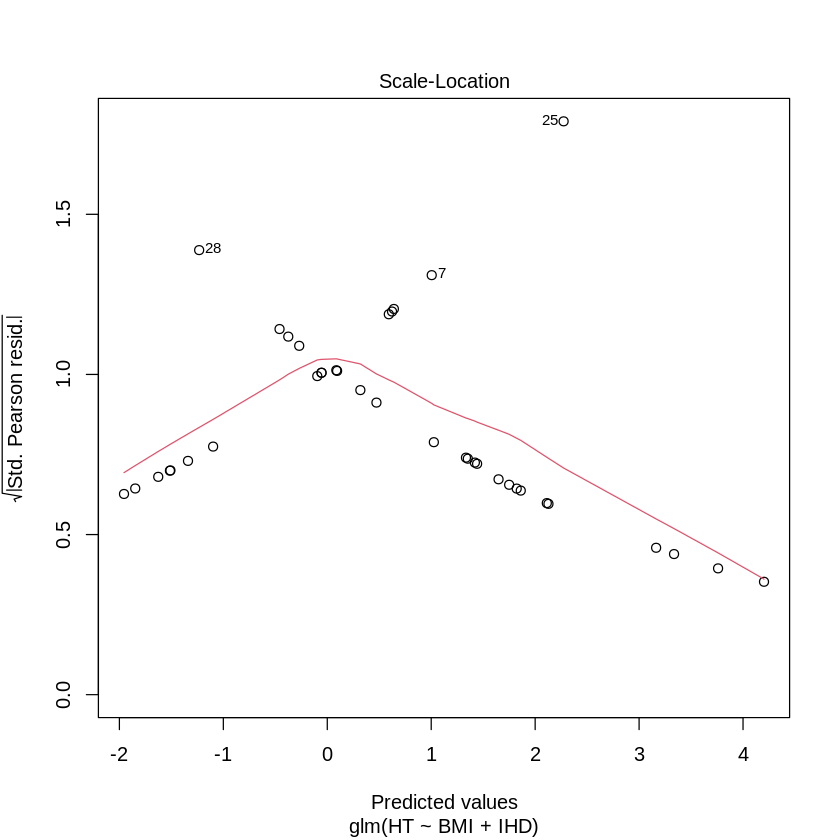

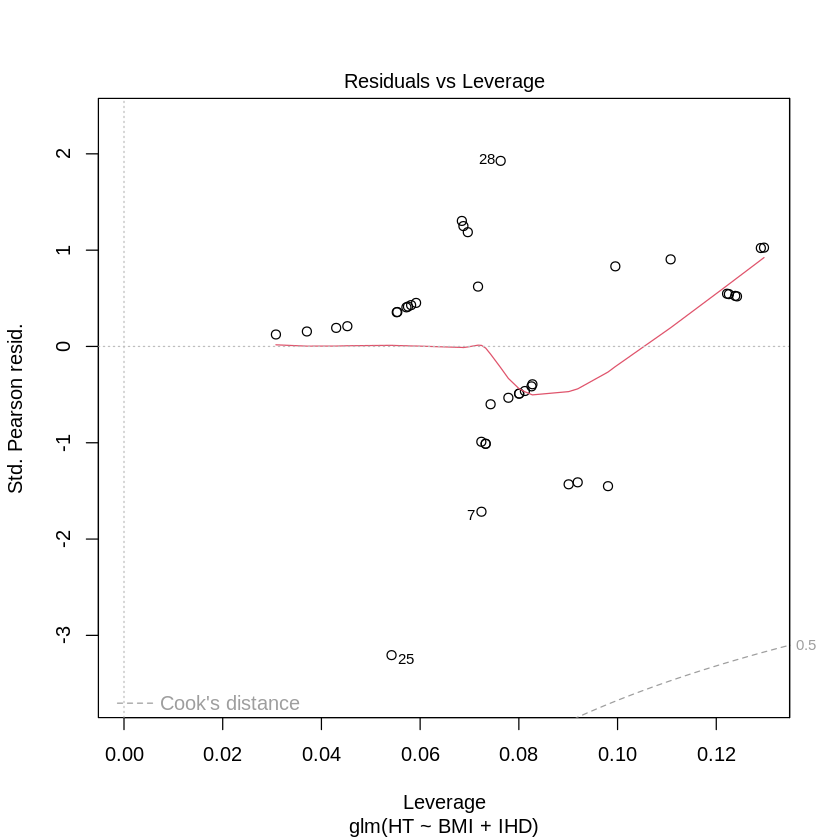

In [ ]:
plot(logr_m2)



1.   В первой графе можно что предиктором и исходной дисперсией не линейная связь.

2.   Остатки вроде совпадают нормальному распределению.


3.   Остатки нормально распределены в этом диапазоне

4.   Нету значении имеющий экстримальное влияние на модель.





In [ ]:
print(anova(logr_m1,logr_m2))

Analysis of Deviance Table

Model 1: HT ~ BMI + Sys + Dia + Choi...25 + Choi...29
Model 2: HT ~ BMI + IHD
  Resid. Df Resid. Dev Df Deviance Pr(>Chi)
1        33     36.704                     
2        35     37.729 -2  -1.0251    0.599


 В данном случае p-значение равно 0.599, что указывает на то, что нет статистически значимых различий в соответствии моделей с учетом уровня значимости 0.05.

In [ ]:
poisson_model <- glm(Choi...25 ~ Dm + HT + Str, family = poisson(link = "log"), data = meta)
summary(poisson_model)


Call:
glm(formula = Choi...25 ~ Dm + HT + Str, family = poisson(link = "log"), 
    data = meta)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.46770    0.01699 321.786  < 2e-16 ***
Dm          -0.17341    0.03662  -4.735 2.19e-06 ***
HT           0.06199    0.02199   2.819  0.00482 ** 
Str         -0.10474    0.04916  -2.131  0.03310 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 261.7  on 37  degrees of freedom
Residual deviance: 231.4  on 34  degrees of freedom
AIC: 517.08

Number of Fisher Scoring iterations: 4


Все три независимые переменные (Dm, HT, Str) являются статистически значимыми (p-значения меньше 0.05), что указывает на их важность при объяснении изменчивости в зависимой переменной Choi...25.

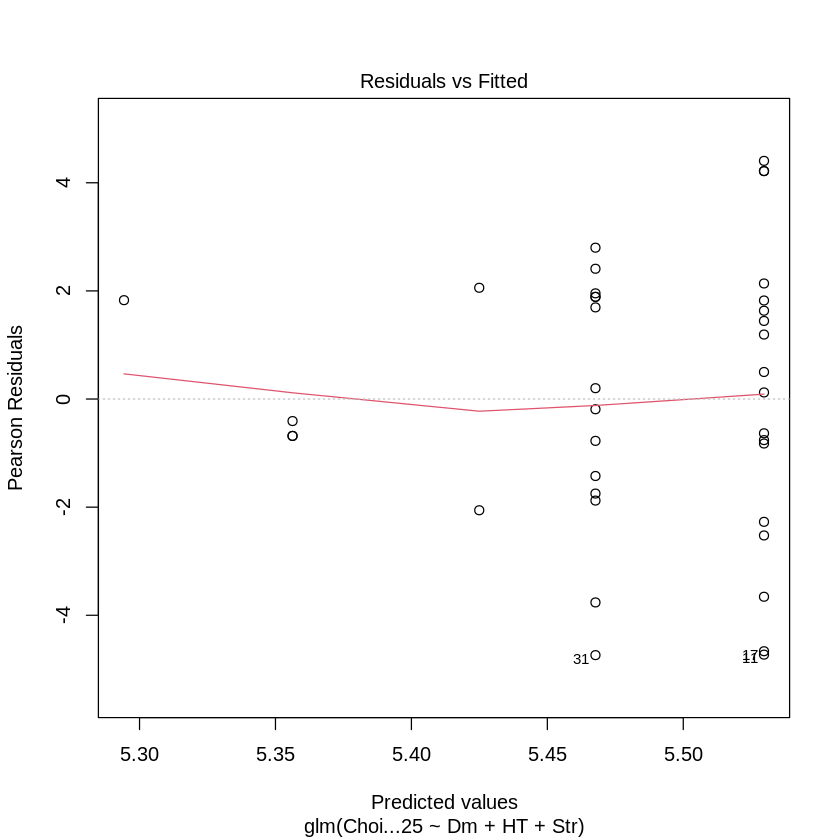

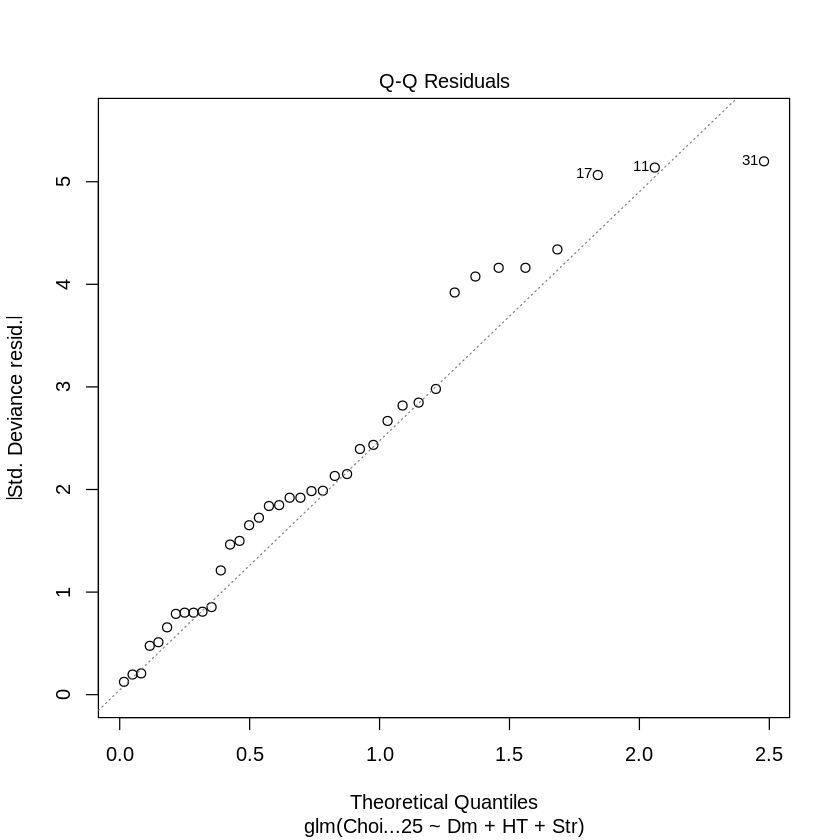

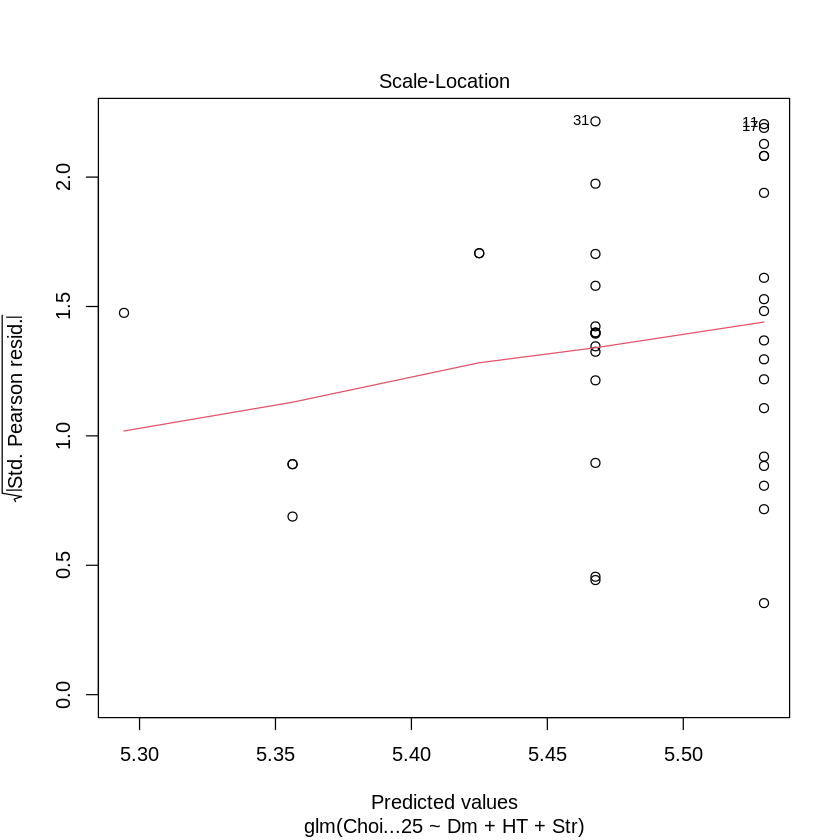

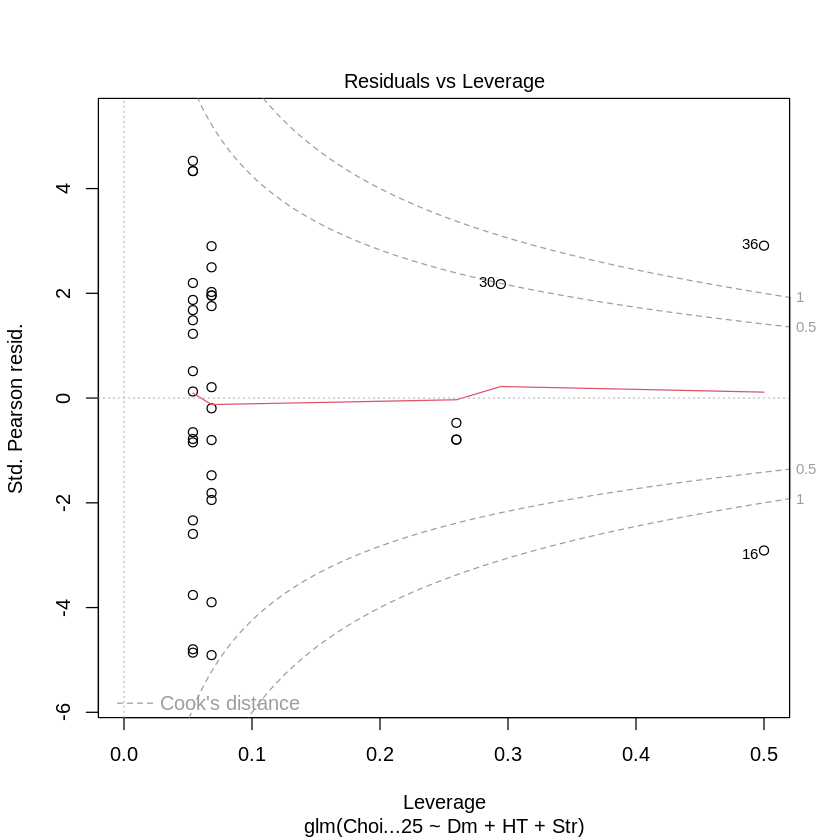

In [ ]:
plot(poisson_model)

In [ ]:
help(lm)

In [ ]:
model <- lm(formula = Choi...25~ HDLi...27 + LDLi...28, data = meta )
summary(model)


Call:
lm(formula = Choi...25 ~ HDLi...27 + LDLi...28, data = meta)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.902  -8.687  -1.274   4.445  47.024 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26.04041   19.72814   1.320    0.195    
HDLi...27    0.98050    0.18940   5.177 9.40e-06 ***
LDLi...28    0.99787    0.07638  13.064 5.07e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.45 on 35 degrees of freedom
Multiple R-squared:  0.8301,	Adjusted R-squared:  0.8204 
F-statistic: 85.51 on 2 and 35 DF,  p-value: 3.373e-14


Predictors (HDLi...27 and LDLi...28) being statistically significant in predicting the dependent variable (Choi...25). The adjusted R-squared value suggests that around 82.04% of the variance in the dependent variable is explained by the independent variables in the model.

In [ ]:
model2 <- lm(formula = Choi...25~ HDLi...27 + LDLi...28 + BMI, data = meta )
summary(model2)


Call:
lm(formula = Choi...25 ~ HDLi...27 + LDLi...28 + BMI, data = meta)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.459  -7.570  -0.278   4.667  50.696 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -23.73166   23.25608  -1.020  0.31472    
HDLi...27     1.10719    0.17237   6.423 2.44e-07 ***
LDLi...28     0.97201    0.06817  14.258 6.61e-16 ***
BMI           1.65637    0.51017   3.247  0.00263 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.47 on 34 degrees of freedom
Multiple R-squared:  0.8703,	Adjusted R-squared:  0.8589 
F-statistic: 76.06 on 3 and 34 DF,  p-value: 3.697e-15


Adding BMI as a predictor has improved the model fit, with a higher adjusted R-squared value (85.89%). Additionally, the coefficient for BMI is statistically significant (p < 0.05), suggesting that BMI is a meaningful predictor of the dependent variable even after considering HDL and LDL.

In [ ]:
print(anova(model,model2))

Analysis of Variance Table

Model 1: Choi...25 ~ HDLi...27 + LDLi...28
Model 2: Choi...25 ~ HDLi...27 + LDLi...28 + BMI
  Res.Df     RSS Df Sum of Sq      F   Pr(>F)   
1     35 10654.1                                
2     34  8132.7  1    2521.4 10.541 0.002626 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In this case, the p-value
 is significant (p = 0.002626), suggesting that the addition of the predictor
BMI significantly improves the fit of the model. Therefore, Model 2 (which includes
BMI) provides a better fit to the data compared to Model 1.